In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import rosen

In [2]:
from pypoptim.algorythm import Solution
from pypoptim.algorythm.ga import GA

# Simple example

In [3]:
def error(x):
    return rosen(x)

class Sol(Solution):
    
    def update(self):
        self._y = error(self.x)
        
    def is_valid(self):
        return self.is_updated()

In [4]:
ndim = 2
bounds = np.tile([-5, 5], (ndim, 1))

ga_optim = GA(Sol, bounds)

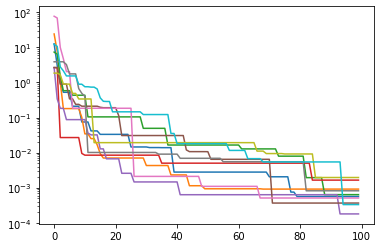

In [5]:
n_solutions = 25
n_elites = 5
n_epochs = 100

for _ in range(10):
    
    population = ga_optim.generate_population(n_solutions)

    loss = []

    for i in range(n_epochs):
        
        ga_optim.update_population(population)
            
        loss.append(min(population).y)
            
        elites  = ga_optim.get_elites(population, n_elites)
        mutants = ga_optim.get_mutants(population, n_solutions - n_elites)
        
        population = elites + mutants

    plt.semilogy(loss)

In [6]:
ga_optim.update_population(population)
x = np.array([sol.x for sol in sorted(population)])

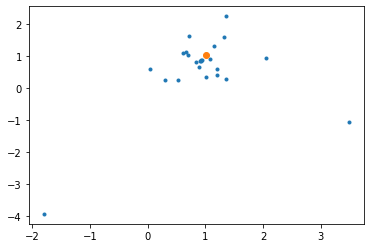

In [8]:
plt.plot(x[:, 0], x[:, 1], '.')
plt.plot(x[0, 0], x[0, 1], 'o')